## Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2 # opencv untuk image processing
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize, LabelBinarizer
from keras.preprocessing import image
from keras.utils import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical

## Sekilas data

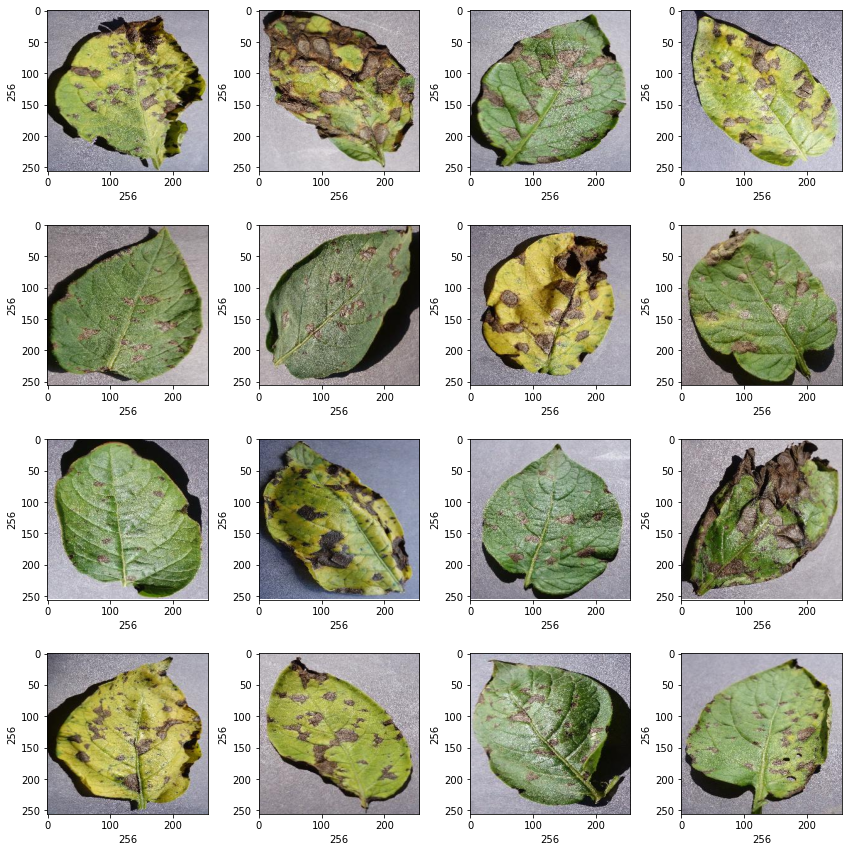

In [2]:
plt.figure(figsize=(12,12))
path = "Data/Plant_images_pianalytix/Potato___Early_blight"
data_foto = os.listdir(path)

for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    # ambil satu gambar secara acak
    rand_img = imread(path + '/' + random.choice(sorted(data_foto)))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1]) # shape[1] : width
    plt.ylabel(rand_img.shape[0]) # shape[0] : height

Semua gambar berukuran 256x256 px

## Konversi image ke array

In [19]:
image = cv2.imread(path + '/b475147c-92bc-419a-b2c3-7d5aabbb79ec___RS_Early.B 7379.JPG')
# Memastikan ukuran gambar menjadi 256x256 px
image1 = cv2.resize(image, (256, 256))
# Mengubah color space gambar
# image2 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
image2 = img_to_array(image1)

In [29]:
# bentuk fungsi
# convert semua gambar dalam folder jadi array
def convert_image_to_array(img_dir):
    try:
        image = cv2.imread(img_dir)
        if image is not None:
            image = cv2.resize(image, (256, 256))
            # image2 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
            return img_to_array(image)
        else:
            return np.array([])
    except Exception as e:
        print(f"error: {e}")
        return None

In [32]:
# tes
# convert_image_to_array("Data\Plant_images_pianalytix\Tomato___Bacterial_spot\dfce64d1-9954-4922-8beb-2681e2e6b896___GCREC_Bact.Sp 2961.JPG")

In [33]:
root_dir = listdir("Data/Plant_images_pianalytix")
root_dir

['Corn_(maize)___Common_rust_',
 'Potato___Early_blight',
 'Tomato___Bacterial_spot']

In [49]:
labels = ['Corn-Common_rust', 'Potato-Early_blight', 'Tomato-Bacterial_spot']
binary_labels = [0,1,2]
image_list, label_list = [], []
label = 0

for directory in root_dir:
    plant_image_list = listdir(f"Data/Plant_images_pianalytix/{directory}")
    for files in plant_image_list:
        image_path = f"Data/Plant_images_pianalytix/{directory}/{files}"
        image_list.append(convert_image_to_array(image_path))
        label_list.append(binary_labels[label])
    label += 1

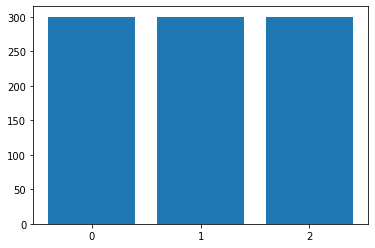

In [66]:
from collections import Counter
jumlah_gambar = Counter(label_list)
plt.bar(jumlah_gambar.keys(), jumlah_gambar.values())
plt.xticks([0,1,2])
plt.show()